# TASKS



1. Fix Layout Structure
  * Inheritance from PIL Image class
2. Create a readme 
  * for the class functions you will be using from the Super Class PIL Image
  * for the functions that will be overrided
  * for the additional functions related to confidence intervals

3. Add Watermark and try to detect the watermark in the image. 
  * Watermark is blended with a transparency mask currently, want to use a custom watermark 
  * Watermark detection 
  * Inpainting, how to remove watermark. 



# Defining Layout Structure

In [ ]:
# Install pillow in order to import PIL 
!pip install pillow
!pip install overloading
!pip install scikit-image

# Reference for the ReadMe file

[Python Documentation on PIL Image](https://pillow.readthedocs.io/en/stable/reference/Image.html)

In [267]:
#%% [code]
#@title Run Cell and Search for Documentation used {display-mode: "form"}

# This code will be hidden when the notebook is loaded.
import ipywidgets as widgets
import sys
from google.colab import output
from os import listdir
import os
from skimage import io, transform
import matplotlib.pyplot as plt
import numpy as np
from typing import overload
import skimage

DICT_FUNC = {"skimage.transform.resize": skimage.transform.resize.__doc__,
             "io.imshow": io.imshow.__doc__,
             "skimage": skimage.__doc__
             }

def on_change(change):
  global dict_func
  with output.use_tags('code_chunk'):
    sys.stdout.flush();
    if change['type'] == 'change' and change['name'] == 'value':
      output.clear(output_tags='code_chunk')
      sys.stdout.write("Displaying Docs for {} \n {}".format(change['new'][0] , DICT_FUNC[change['new'][0]]))
      sys.stdout.flush();

w = widgets.SelectMultiple(
    options= list(DICT_FUNC.keys()),
    # value=['Image.open'],
    #rows=10,
    description='View Docs',
    disabled=False
)


w.observe(on_change)

display(w)


SelectMultiple(description='View Docs', options=('skimage.transform.resize', 'io.imshow', 'skimage'), value=()…

Displaying Docs for skimage.transform.resize 
 Resize image to match a certain size.

    Performs interpolation to up-size or down-size N-dimensional images. Note
    that anti-aliasing should be enabled when down-sizing images to avoid
    aliasing artifacts. For down-sampling with an integer factor also see
    `skimage.transform.downscale_local_mean`.

    Parameters
    ----------
    image : ndarray
        Input image.
    output_shape : tuple or ndarray
        Size of the generated output image `(rows, cols[, ...][, dim])`. If
        `dim` is not provided, the number of channels is preserved. In case the
        number of input channels does not equal the number of output channels a
        n-dimensional interpolation is applied.

    Returns
    -------
    resized : ndarray
        Resized version of the input.

    Other parameters
    ----------------
    order : int, optional
        The order of the spline interpolation, default is 0 if
        image.dtype is bool and 1

In [268]:
# Coded by: Jasen Babcock Python 3.7 in Google Colab 03_04_2022

# Imports
import PIL.Image as Image
from os import listdir
import os
from skimage import io, transform
import PIL
import matplotlib.pyplot as plt
import numpy as np
from typing import overload
import skimage as sk

# Mount Google Colab to load in images. 
from google.colab import drive
drive.mount('/gdrive')

# Get file paths
workspace_path = '/gdrive/MyDrive/Independent_Study/'
workspace_names = listdir(workspace_path)


# Class objects
# Parent Class
class Photo():
  def __init__(self, fp, fname, image):
    self.__fp = fp
    self.__fname = fname
    self.__image = image
    self.__shape = np.asarray(image).shape

  @property
  def fp(self):
    return self.__fp
  @property
  def fname(self):
    return self.__fname 
  @property
  def image(self):
    return self.__image
  @property
  def shape(self):
    return self.__shape
  @property
  def width(self):
    return self.__shape[0]
  @property
  def hieght(self):
    return self.__shape[1]
  @property
  def channel(self):
    try:
      return self.__shape[2]
    except ValueError as e:
      print(e)
      return None  
  @fp.setter
  def fp(self, fp):
    self.__fp = fp  
  @fname.setter
  def fname(self, fname):
    self.__fname = fname 
  @image.setter
  def image(self, image):
    self.__image = image
  @shape.setter
  def shape(self, shape):
    self.__shape = shape

  # Class Methods
  def describe(self):
    name = self.fname
    shape = self.shape 
    print("Image {} has a shape of {} ".format(name, shape))

  def add_to_book(self, book):
      if book is not None:
        book[self.__fname] = self.__image
      else:
        book[self.__fname] = self.__image

  def is_in_book(self, book):
    return self.__image in book.value
      
  def show(self):
    io.imshow(self.__image)
    io.show()

  @staticmethod
  def save(fp, fname, image_array):
    io.imsave(os.path.join(fp, fname), image_array)
  @staticmethod
  def show_array(image_array):
    io.imshow(image_array)
    io.show()


# Child class
class Image_Processing(Photo):
  def __init__(self, fp , fname):
    img = io.imread(os.path.join(fp, fname))
    super().__init__(fp, fname, img)
  
  # Class Methods
  def remove_color(self, target_color):
    """
    Inputs target color
    Output is np.ndarray of pixel values. 
    if file_path is included the image will be saved. 
    """
    image = self.image
    temp_image = np.where(image == target_color, 0, image)
    self.image = temp_image
  
  def alpha_blend_watermark(self, watermark_array, target_shape, location, alpha):
    def mask(watermark_array, target_shape):
      """
      Input (not yet implemented) shape is a tuple with desired size
      Input watermark_array is an ndarray.
      Creates a mask that seperates the color accross the mean pixel,
      and to equal a 1 or 0.      
      Outputs: an numpy ndarray 
      """    
      watermark_array = watermark_array.astype(np.uint8)
      mask = np.full(target_shape, 1.0, dtype=np.uint8)
      watermark_array = transform.resize(watermark_array, target_shape, cval=0)
      mask = np.where(watermark_array >= 0.5, 1.0, 0.0)
      return mask.astype(np.uint8)

    img_with_watermark = self.image.astype(np.uint8)
    mask1 = mask(watermark_array, target_shape)
    n, d, c = target_shape
    x, y = location
    try:
      sub_img = self.image[x:n , y:d,:]
      img_with_watermark[x:n , y:d,:] = np.multiply(sub_img, mask1)
      image_with_watermark = self.image*(1 - alpha) + alpha*img_with_watermark
      return image_with_watermark.astype(np.uint8)
    except ValueError as e:
      # Must resize mask to fit inside of image.
      print(e, "\n Rescaling to 1")
      return self.alpha_blend_watermark(watermark_array, self.shape, location, alpha)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


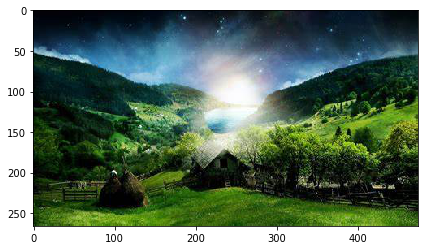

Image OIP.jpg has a shape of (266, 474, 3) 


In [269]:
# Creating a photo and adding to the photobook
# defining my  photobook as book1
book1 = dict() 

# Set file paths
## Image file Path
img_path = os.path.join(workspace_path, "Images/")
image_names = listdir(img_path)

# defining my photo name as test_fname  
test_fname = image_names[0]  # select first image in folder
test_img = Image_Processing(fp=img_path, fname=test_fname)

test_img.add_to_book(book1)
test_img.show()
test_img.describe()

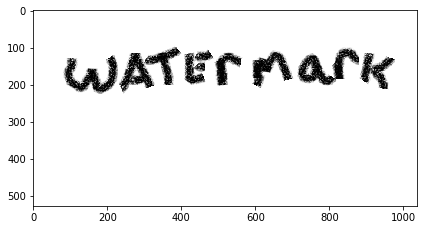

Image watermark_brushCrayon.png has a shape of (528, 1038, 3) 


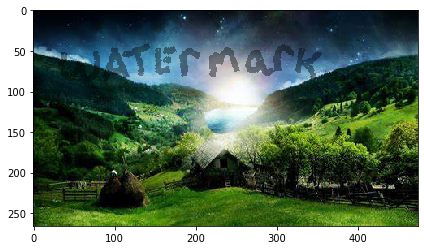

In [270]:
# Set file paths
## Image file Path
img_path = os.path.join(workspace_path, "Images/")
image_names = listdir(img_path)

# defining my photo name as test_fname  
test_fname = image_names[0]  # select first image in folder
test_img = Image_Processing(fp=img_path, fname=test_fname)


## Watermark file path
water_path = os.path.join(workspace_path, "Watermarks/")
watermark_names = listdir(water_path)

# defining my watermark name as water_fname  
water_fname = watermark_names[0]  # select first watermark image in folder
water_img = Image_Processing(fp=water_path, fname=water_fname)
water_img.add_to_book(book1)

# Removing all the white pixels to convert to a transparency mask
water_img.show()
water_img.describe()

# set Shape of desired watermark
adjust_shape = lambda h, w, c, size_param: np.array([int(size_param*h), int(size_param*w), c])
h, w, c = test_img.shape
size_param = 0.8
target_shape = adjust_shape(h, w, c, size_param)

location = [0,0]
alpha = 0.4
composite_img = test_img.alpha_blend_watermark(water_img.image, target_shape, location, alpha)

Photo.show_array(composite_img)